In [1]:
import pandas as pd
# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load dataset
data = pd.read_csv("../data/dataset_1.csv")

In [3]:
data.head()

# Get columns with object or categorical dtype
categorical_cols = data.columns[(data.dtypes==object) | (data.dtypes==bool)].tolist()
print(categorical_cols)

# Loop through each categorical column and print what are the categoris they have (only done for test dataset)
for col in categorical_cols:
    categories = data[col].unique()
    print(f"{col}: {categories}")

    
data.replace('-', 0, inplace=True)
data.replace('.', 0, inplace=True)
display(data.head())
    
    
data['Mortality male'] = data['Mortality male'].astype(int)
data['Mortality female'] = data['Mortality female'].astype(int)

data.dtypes

['Mortality female', 'Mortality male']
Mortality female: ['5' '2' '3' '4' '6' '58' '67' '32' '8' '11' '17' '12' '10' '.' '7']
Mortality male: ['2' '1' '-' '75' '3' '4' '0']


,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.41
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.69
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.86
3,26.3,3,0,10.318,8540,53.6,136.0,130,7990,4170.78
4,26.4,2,0,10.316,9560,53.7,136.0,130,8915,4653.63


Age                   float64
Mortality female        int32
Mortality male          int32
sex ratio             float64
Total Eggs              int64
Egg Weight            float64
Feed female           float64
Feed male               int64
Hatching Eggs           int64
total hatched eggs    float64
dtype: object

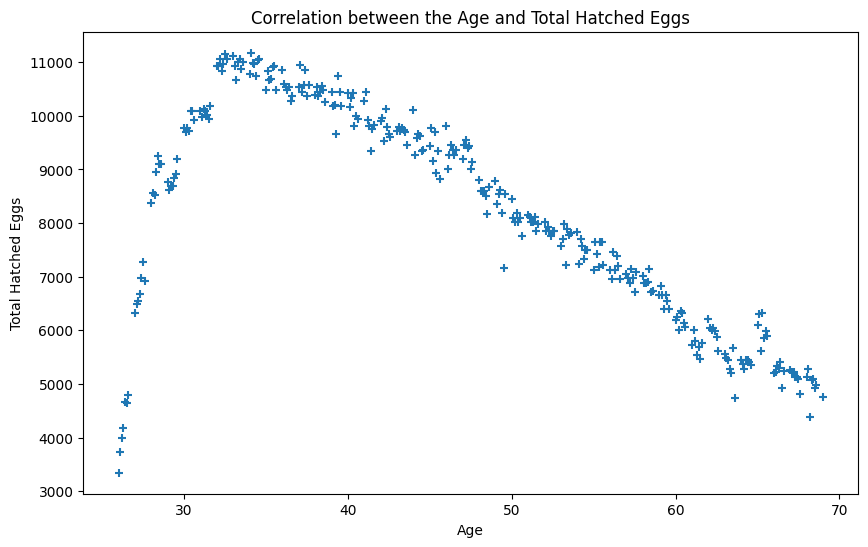

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Age and Total Hatched Eggs')
plt.xlabel('Age')
plt.ylabel('Total Hatched Eggs');

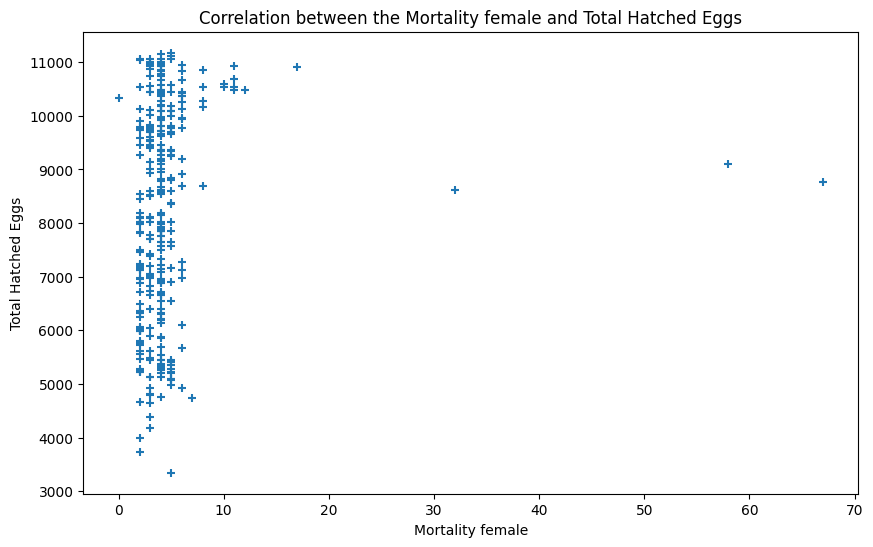

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Mortality female'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Mortality female and Total Hatched Eggs')
plt.xlabel('Mortality female')
plt.ylabel('Total Hatched Eggs');

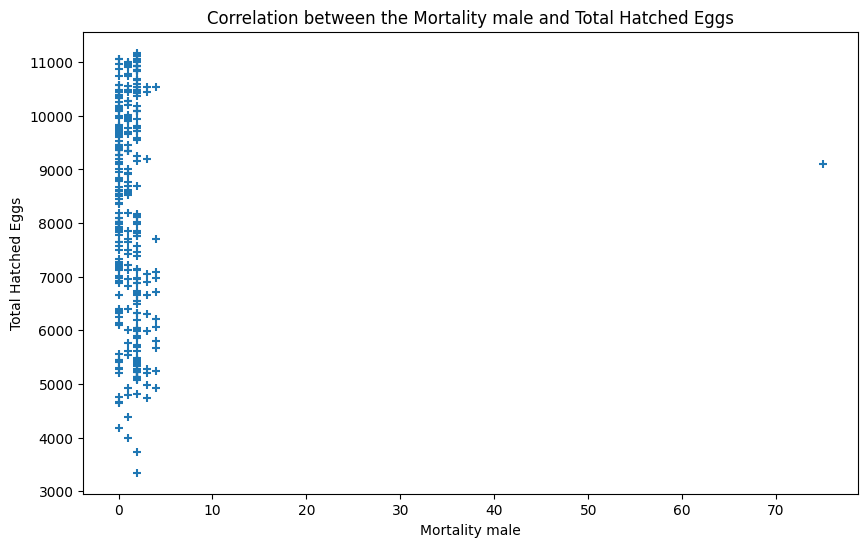

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Mortality male'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Mortality male and Total Hatched Eggs')
plt.xlabel('Mortality male')
plt.ylabel('Total Hatched Eggs');

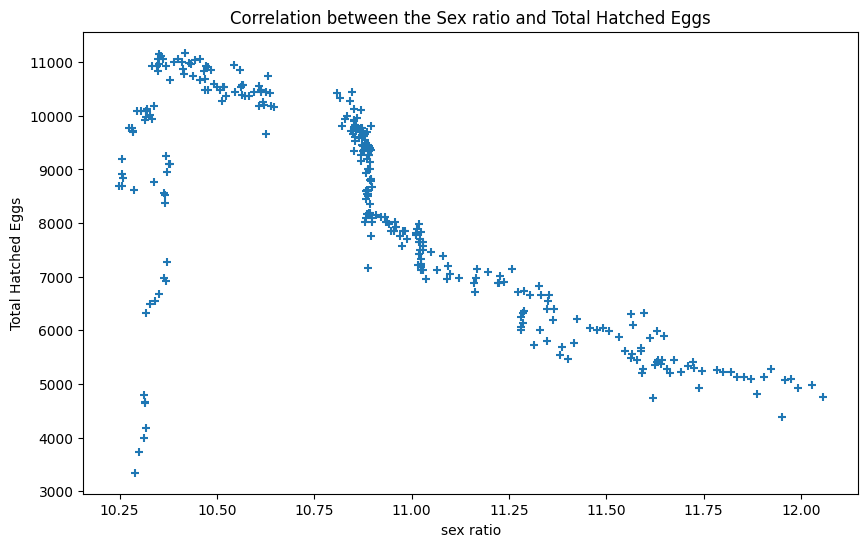

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['sex ratio'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Sex ratio and Total Hatched Eggs')
plt.xlabel('sex ratio')
plt.ylabel('Total Hatched Eggs');

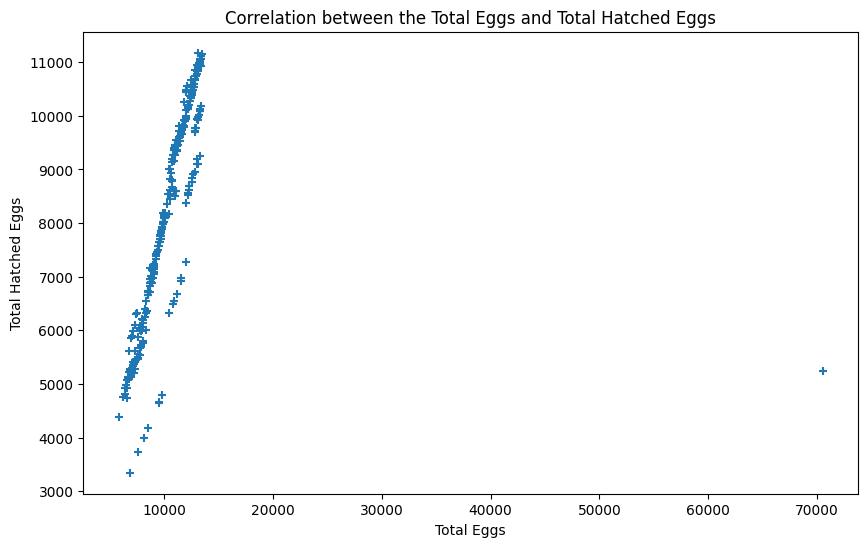

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Eggs'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Total Eggs and Total Hatched Eggs')
plt.xlabel('Total Eggs')
plt.ylabel('Total Hatched Eggs');

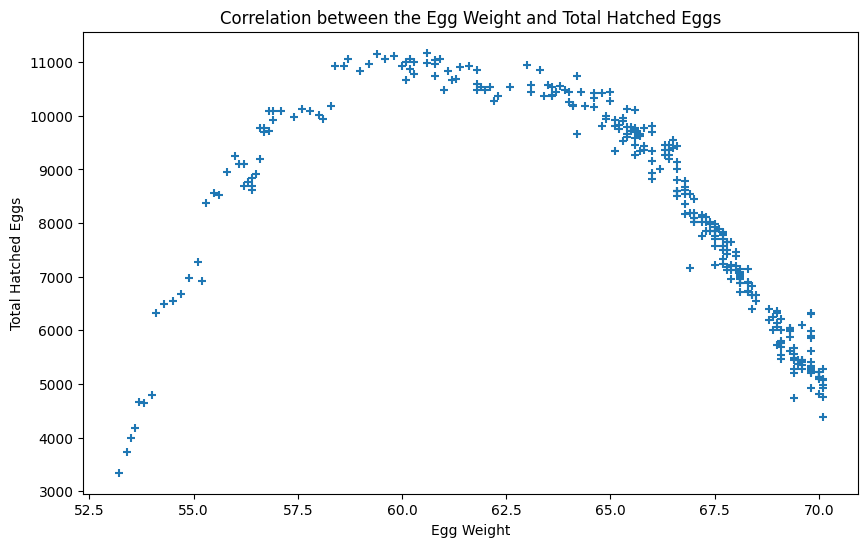

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Egg Weight'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Egg Weight and Total Hatched Eggs')
plt.xlabel('Egg Weight')
plt.ylabel('Total Hatched Eggs');

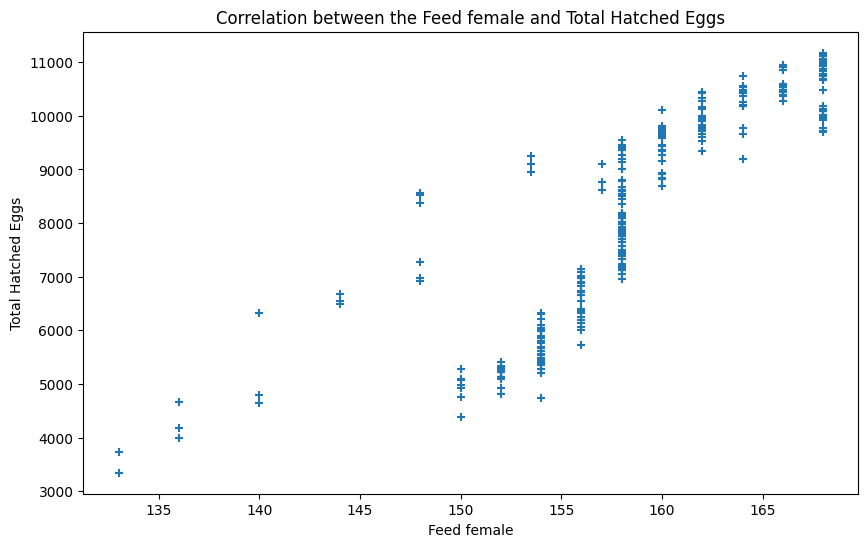

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feed female'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Feed female and Total Hatched Eggs')
plt.xlabel('Feed female')
plt.ylabel('Total Hatched Eggs');

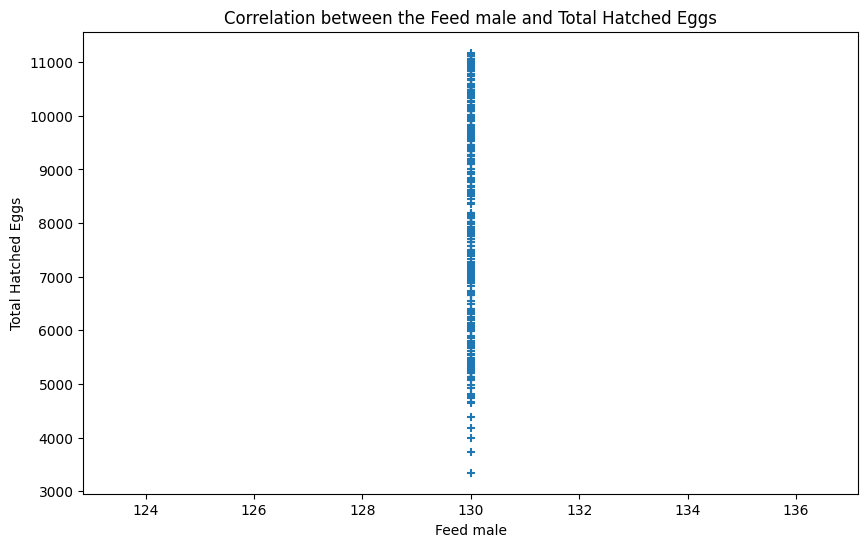

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feed male'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the Feed male and Total Hatched Eggs')
plt.xlabel('Feed male')
plt.ylabel('Total Hatched Eggs');

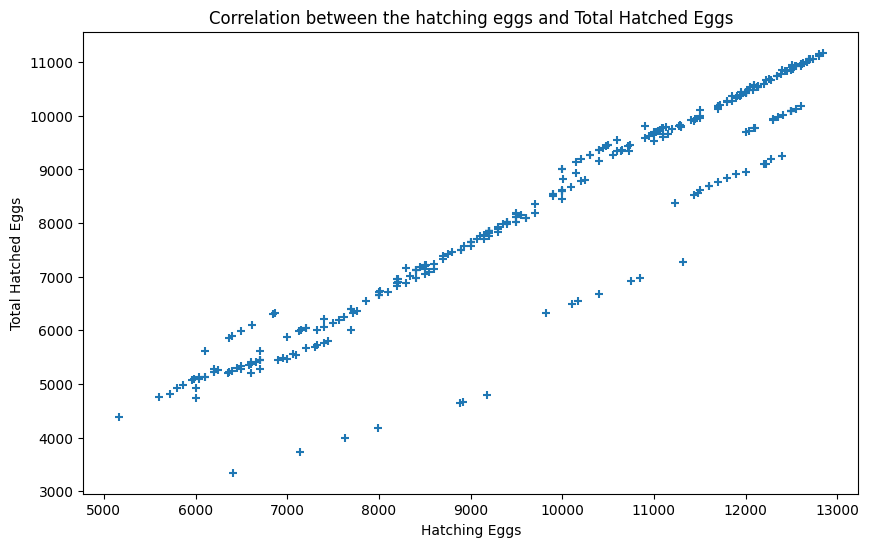

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hatching Eggs'], data['total hatched eggs'], marker='+')
plt.title('Correlation between the hatching eggs and Total Hatched Eggs')
plt.xlabel('Hatching Eggs')
plt.ylabel('Total Hatched Eggs');

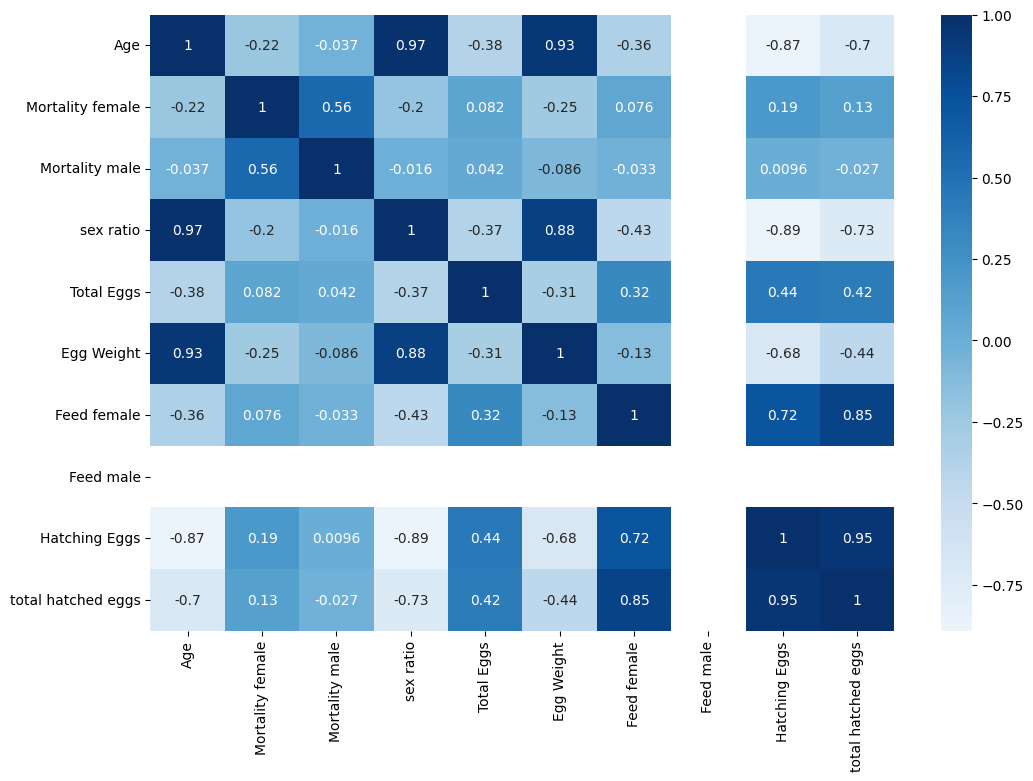

In [18]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()